<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Assignment 2 - BuyWise Analytics

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

## Data Preprocessing

`Initial Inspection`

In [130]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [131]:
# Importing datasets 
features = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/stores data-set.csv")

In [132]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [22]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [24]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Statistic of each dataframe

In [25]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [26]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [27]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [28]:
num_feature_samples, num_features = features.shape
num_sale_samples, num_sale_features = sales.shape
num_stores_samples, num_stores_features = stores.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


#### Checking for missing values

In [29]:
# For the feature data 
for col in features.columns:
    count_null = features[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Date has 0 null values
The column Temperature has 0 null values
The column Fuel_Price has 0 null values
The column MarkDown1 has 4158 null values
The column MarkDown2 has 5269 null values
The column MarkDown3 has 4577 null values
The column MarkDown4 has 4726 null values
The column MarkDown5 has 4140 null values
The column CPI has 585 null values
The column Unemployment has 585 null values
The column IsHoliday has 0 null values


In [30]:
# For the sales data 
for col in sales.columns:
    count_null = sales[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Dept has 0 null values
The column Date has 0 null values
The column Weekly_Sales has 0 null values
The column IsHoliday has 0 null values


In [31]:
# For the store data 
for col in stores.columns:
    count_null = stores[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Type has 0 null values
The column Size has 0 null values


In [32]:
# Further inspecting the features dataset for missing values
nan_list = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

51% of MarkDown1 values are NaN
64% of MarkDown2 values are NaN
56% of MarkDown3 values are NaN
57% of MarkDown4 values are NaN
51% of MarkDown5 values are NaN
7% of CPI values are NaN
7% of Unemployment values are NaN


#### Checking missing values at store level

In [33]:
# Checking for missing values for store 1
store1 = features[features['Store'] == 1]
nan_list = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = store1[column_name].isnull().sum() / store1[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

51% of MarkDown1 values are NaN
60% of MarkDown2 values are NaN
51% of MarkDown3 values are NaN
51% of MarkDown4 values are NaN
51% of MarkDown5 values are NaN
7% of CPI values are NaN
7% of Unemployment values are NaN


We observe from the data the we haev some missing values in the following features: 
- `All MarkDown's`
- `Consumer Price Index`
- `Unemployment`

When dealing with missing values, it's necessary to understand why these values are missing. 
For 'CPI' and 'Unemployment' we can see that data for all store in the time period of 03-05-2013 - 26-07-2013 are missing. It is fair to assume that this is missing at random, meaning that the data is not randomly missing but there is still possilbe to predict these values. We will, therefore, impute the mising values to reduce the data loss for our ML models. 

For the markdown data, on the other hand, this is structurally missing. From the data description it is clear that we do not have data before Nov 2011. Given that the start time of the data beeing 05-02-2010, it is fair that a good amount of data is missing. When we use Store 1 as an example, we can see that for MarkDown2 there are up to 60% missing values, indicating that there is a majority of missing values than there are actual values. Knowing this, we have mainly two ways of handling this: 

- Adding a constant `0` for all missing values 
- Dropping the MarkDown columns completly

We will compare the results of these methods for our prediction models, and will mainly focus on the method that yields the best results. After inspecting a comparing the methods, we can see that ....


Reference: 
https://the.datastory.guide/hc/en-us/articles/4570444289167-Checking-and-Understanding-Missing-Data


`Data cleaning`

#### Dropping unnecessary columns 

In [133]:
sales.drop(columns=['Dept'], inplace=True)

#### Handling missing values 

In [134]:
# Codes for forward filling the missing values 
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [135]:
# Removing the 'MarkDown' columns 
features_noMD = features.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
print(features_noMD.info())
features_noMD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           8190 non-null   float64       
 5   Unemployment  8190 non-null   float64       
 6   IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 392.0 KB
None


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [136]:
# Replacing all missing values with a zero
featuresMD = features.fillna(0)
featuresMD.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


#### Transforming features

In [137]:
# Encoding 'IsHoliday'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])

In [121]:
#  Converting Type to categorical 
#def convert_store_type(df):
    df_copy = df.copy()
    df_copy.loc[df_copy["Type"] == "A", "Type"] = 0
    df_copy.loc[df_copy["Type"] == "B", "Type"] = 1
    df_copy.loc[df_copy["Type"] == "C", "Type"] = 2
    df_copy["Type"] = df_copy["Type"].astype(int)
    return df_copy
#stores = convert_store_type(stores)

#### Merging the data

In [138]:
# without markdown
tmp_df_noMD = pd.merge(sales, features_noMD, on=['Store', 'Date', 'IsHoliday'], how='left')
df_noMD = pd.merge(stores, tmp_df_noMD, on=['Store'], how='left')
df_noMD.head()

,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,A,151315,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106
1,1,A,151315,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106
2,1,A,151315,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106
3,1,A,151315,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106
4,1,A,151315,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106


In [139]:
# with markdown
tmp_dfMD = pd.merge(sales, featuresMD, on=['Store', 'Date', 'IsHoliday'], how='left')
dfMD = pd.merge(stores, tmp_dfMD, on=['Store'], how='left')
dfMD.head()

,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,A,151315,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,A,151315,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,A,151315,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,A,151315,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


`Exploratory Data Analysis`

#### Analysing the data by date 

In [124]:
# Grouping by date 
df_date = df_noMD.groupby('Date').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min'}).reset_index()
df_date.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday
0,2010-02-05,34.005982,2.719721,167.127993,8.582955,16836.121997,0
1,2010-02-12,34.194934,2.695743,167.115804,8.586010,16352.056032,1
2,2010-02-19,37.864955,2.673293,167.247947,8.580806,16216.658979,0
3,2010-02-26,39.367457,2.684839,167.185780,8.574658,14899.549688,0
4,2010-03-05,43.065956,2.732862,167.449523,8.579666,15921.015727,0


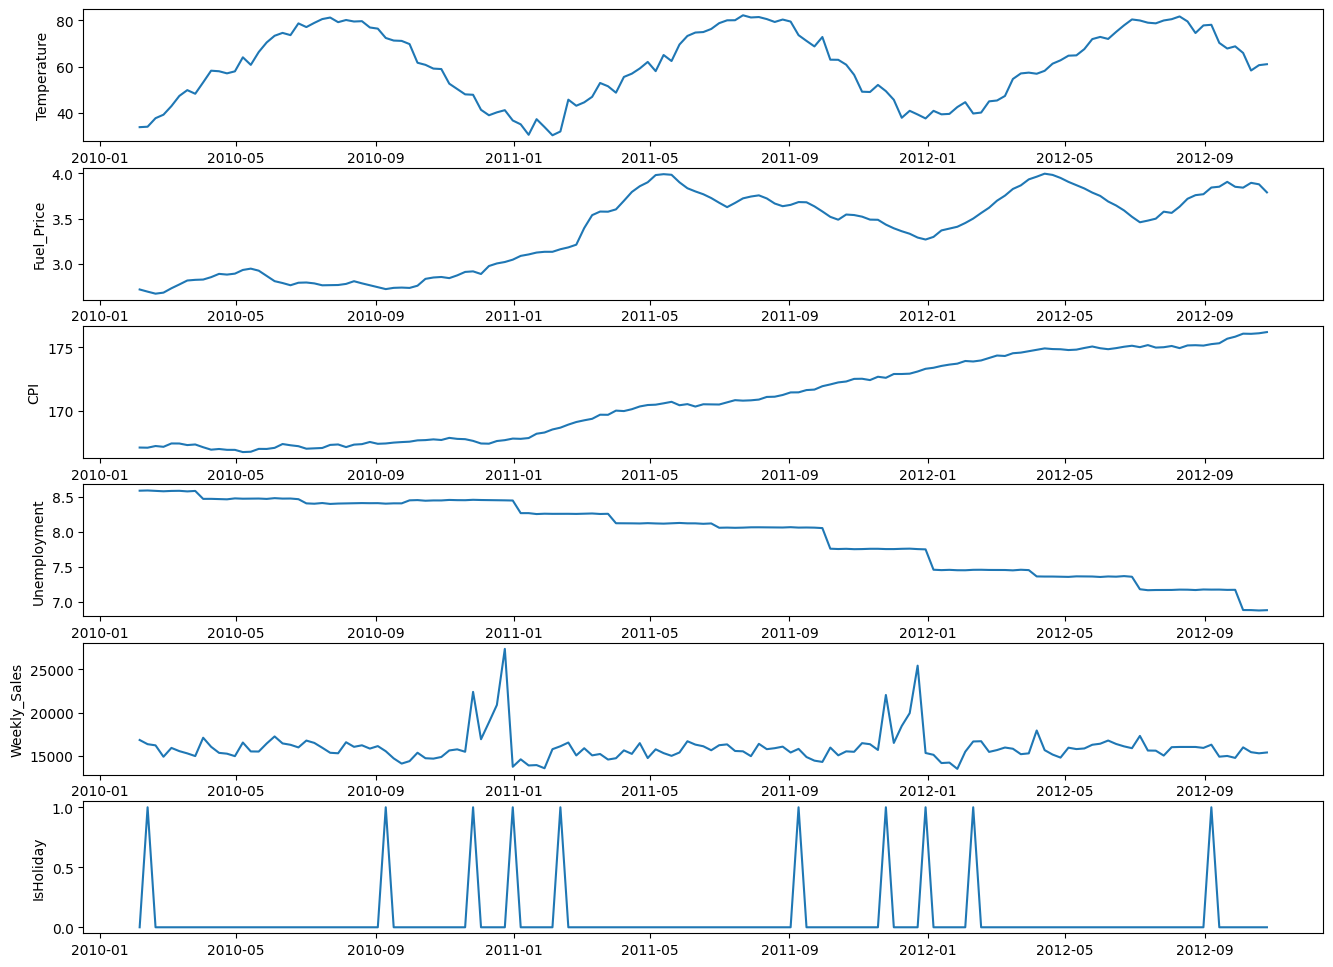

In [101]:
# Plotting all features
fig = plt.figure(figsize = (16, 12))
count_columns_ex_date = len(df_date.columns[1:])
for idx, col in enumerate(df_date.columns[1:]):
    plt.subplot(count_columns_ex_date, 1, idx+1)
    plt.plot(df_date["Date"], df_date[col])
    plt.ylabel(col)

Text(0.5, 1.0, 'Total Weekly Sales')

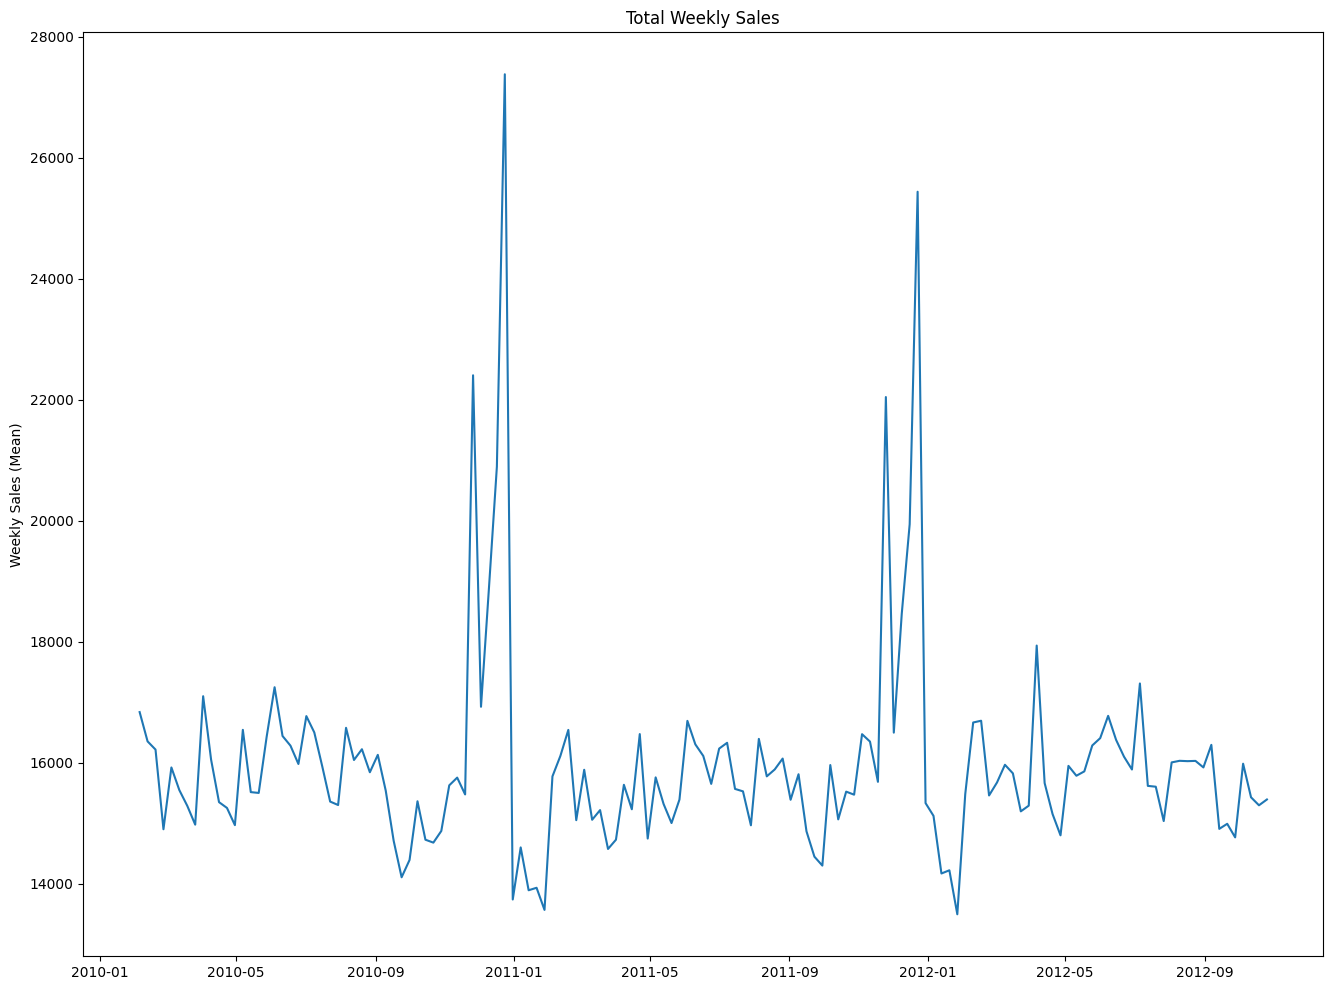

In [77]:
# Plotting Weekly Sales alone
fig = plt.figure(figsize = (16, 12))
plt.plot(df_date["Date"], df_date["Weekly_Sales"])
plt.ylabel("Weekly Sales (Mean)")
plt.title('Total Weekly Sales')

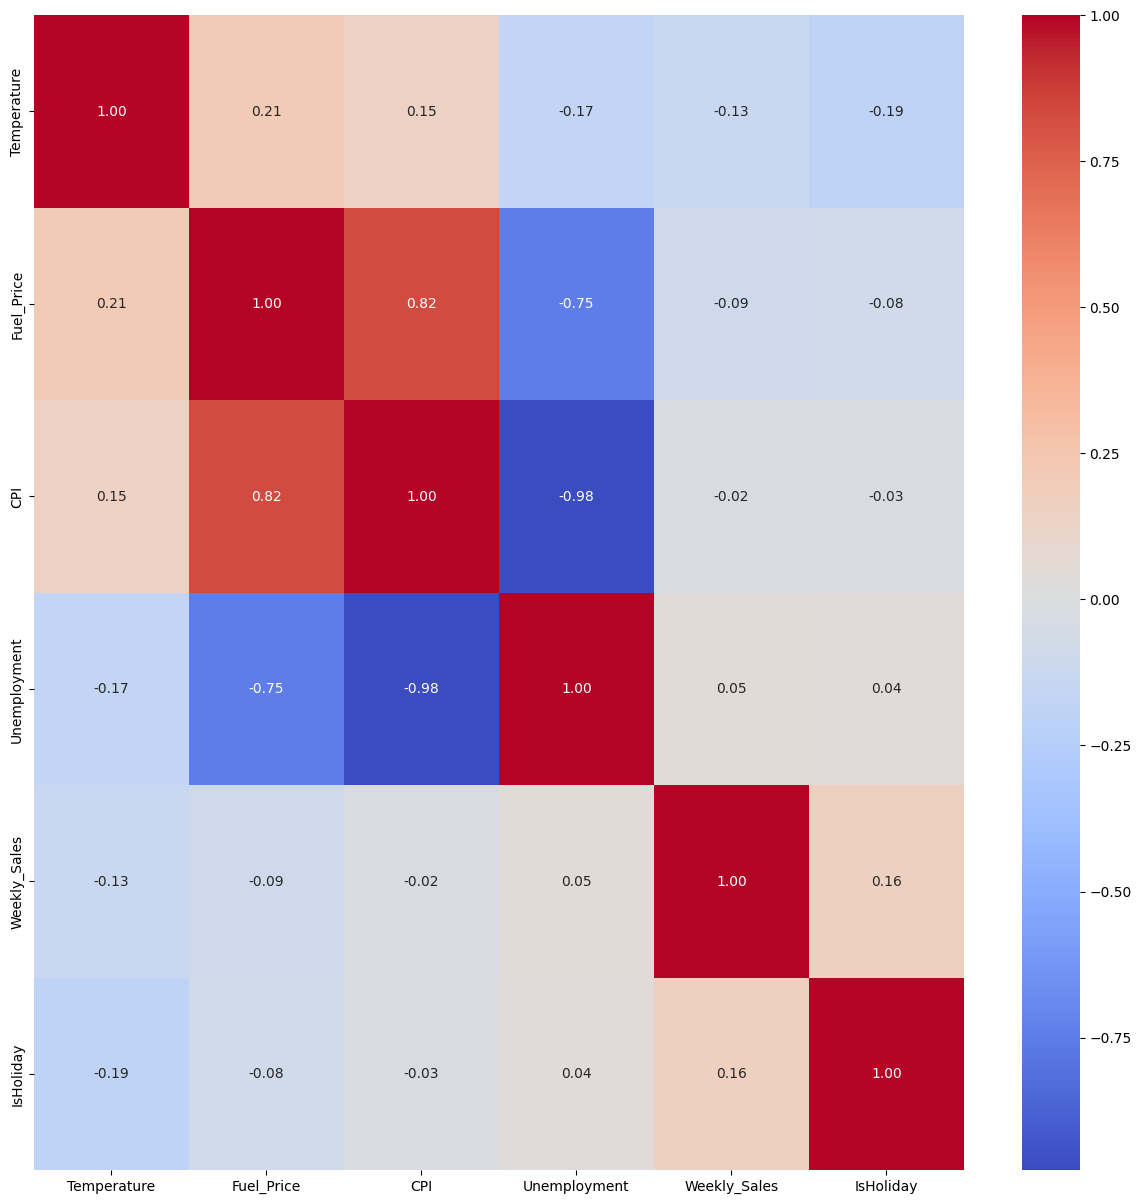

In [78]:
#correlation matrix to see which features are highly correlated to the Weekly Sales feature
corr_matrix = df_date.corr()
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

In [80]:
# Grouping by date 
df_dateMD = dfMD.groupby('Date').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min',
                                       'MarkDown1': 'mean',
                                       'MarkDown2': 'mean',
                                       'MarkDown3': 'mean',
                                       'MarkDown4': 'mean',
                                       'MarkDown5': 'mean'}).reset_index()
df_dateMD.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,2010-02-05,33.277942,2.717869,167.398405,8.576731,16836.121997,0,0.0,0.0,0.0,0.0,0.0
1,2010-02-12,33.361810,2.696102,167.384138,8.567309,16352.056032,1,0.0,0.0,0.0,0.0,0.0
2,2010-02-19,37.038310,2.673666,167.338966,8.576351,16216.658979,0,0.0,0.0,0.0,0.0,0.0
3,2010-02-26,38.629563,2.685642,167.691019,8.561375,14899.549688,0,0.0,0.0,0.0,0.0,0.0
4,2010-03-05,42.373998,2.731816,167.727351,8.572689,15921.015727,0,0.0,0.0,0.0,0.0,0.0


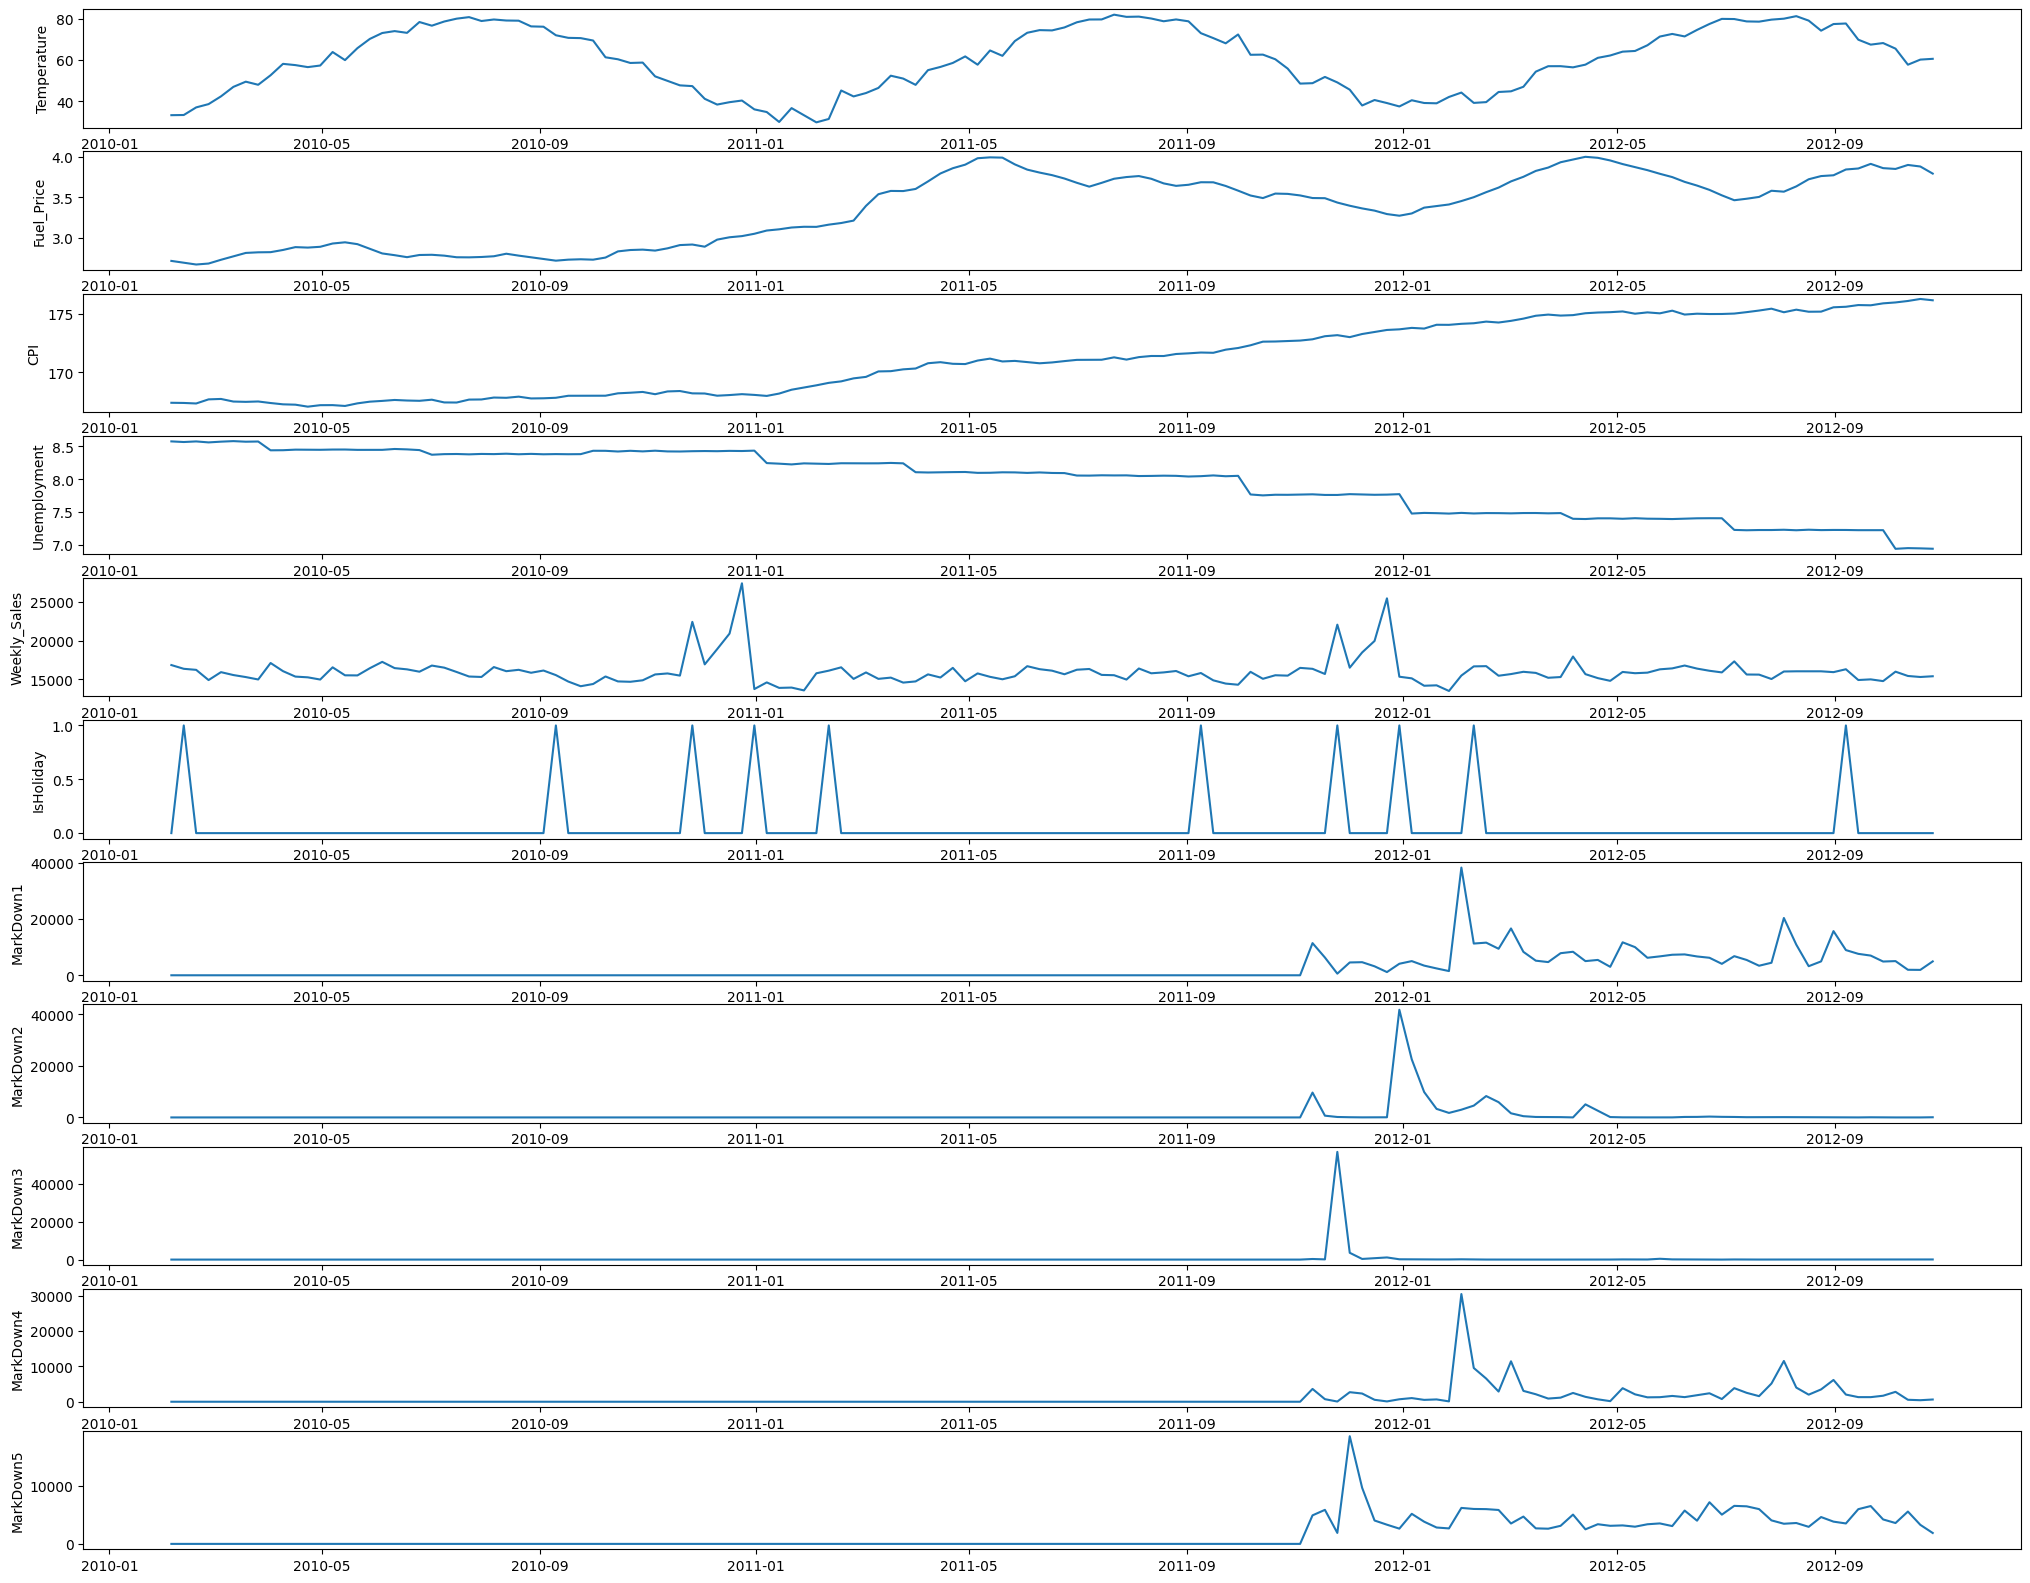

In [86]:
# Plotting all features
fig = plt.figure(figsize = (25, 20))
count_columns_ex_dateMD = len(df_dateMD.columns[1:])
for idx, col in enumerate(df_dateMD.columns[1:]):
    plt.subplot(count_columns_ex_dateMD, 1, idx+1)
    plt.plot(df_dateMD["Date"], df_dateMD[col])
    plt.ylabel(col)

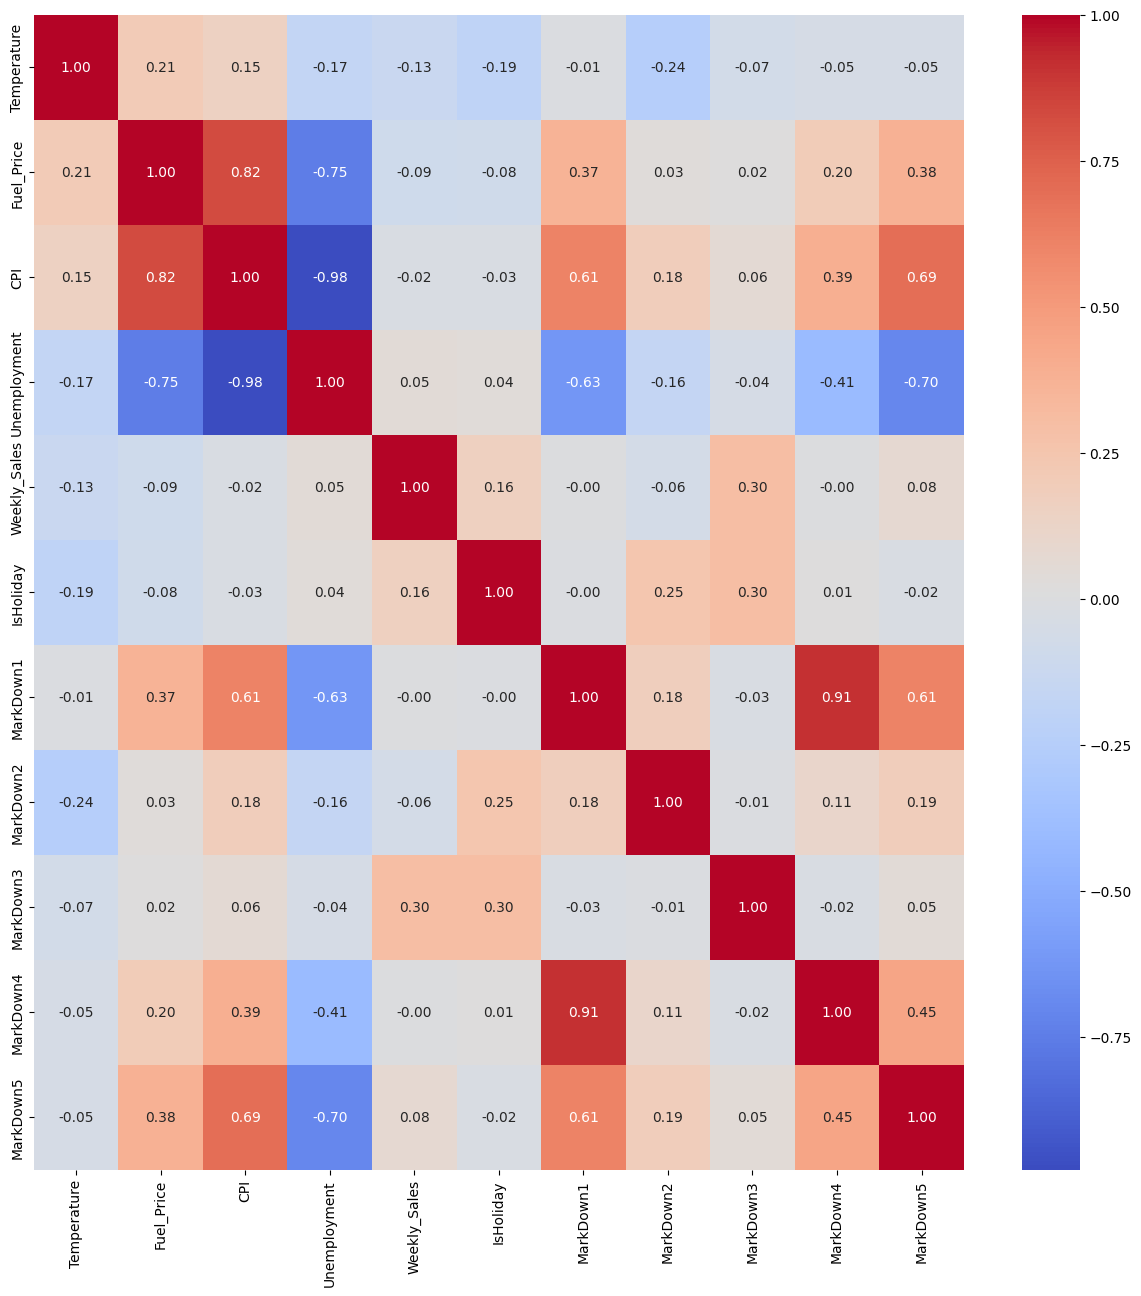

In [87]:
#correlation matrix to see which features are highly correlated to the Weekly Sales feature
corr_matrixMD = df_dateMD.corr()
corr_matrixMD["Weekly_Sales"].sort_values(ascending=False)

# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrixMD, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

#### Analysing the data storewise

In [140]:
# grouping by store 
df_store_noMD = df_noMD.groupby('Store').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min',
                                       'Type': 'min',
                                       'Size': 'min'}).reset_index()
df_store_noMD.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday,Type,Size
0,1,68.224463,3.218811,215.995525,7.610918,21710.543621,0,A,151315
1,2,68.105435,3.219898,215.651869,7.623279,26898.070031,0,A,202307
2,3,71.298627,3.219112,219.402843,7.175602,6373.033983,0,B,37392
3,4,62.176867,3.216237,128.680070,5.965849,29161.210415,0,A,205863
4,5,69.203619,3.220912,216.576516,6.296549,5053.415813,0,B,34875


In [141]:
df_store_noMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         45 non-null     int64  
 1   Temperature   45 non-null     float64
 2   Fuel_Price    45 non-null     float64
 3   CPI           45 non-null     float64
 4   Unemployment  45 non-null     float64
 5   Weekly_Sales  45 non-null     float64
 6   IsHoliday     45 non-null     int64  
 7   Type          45 non-null     object 
 8   Size          45 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.3+ KB


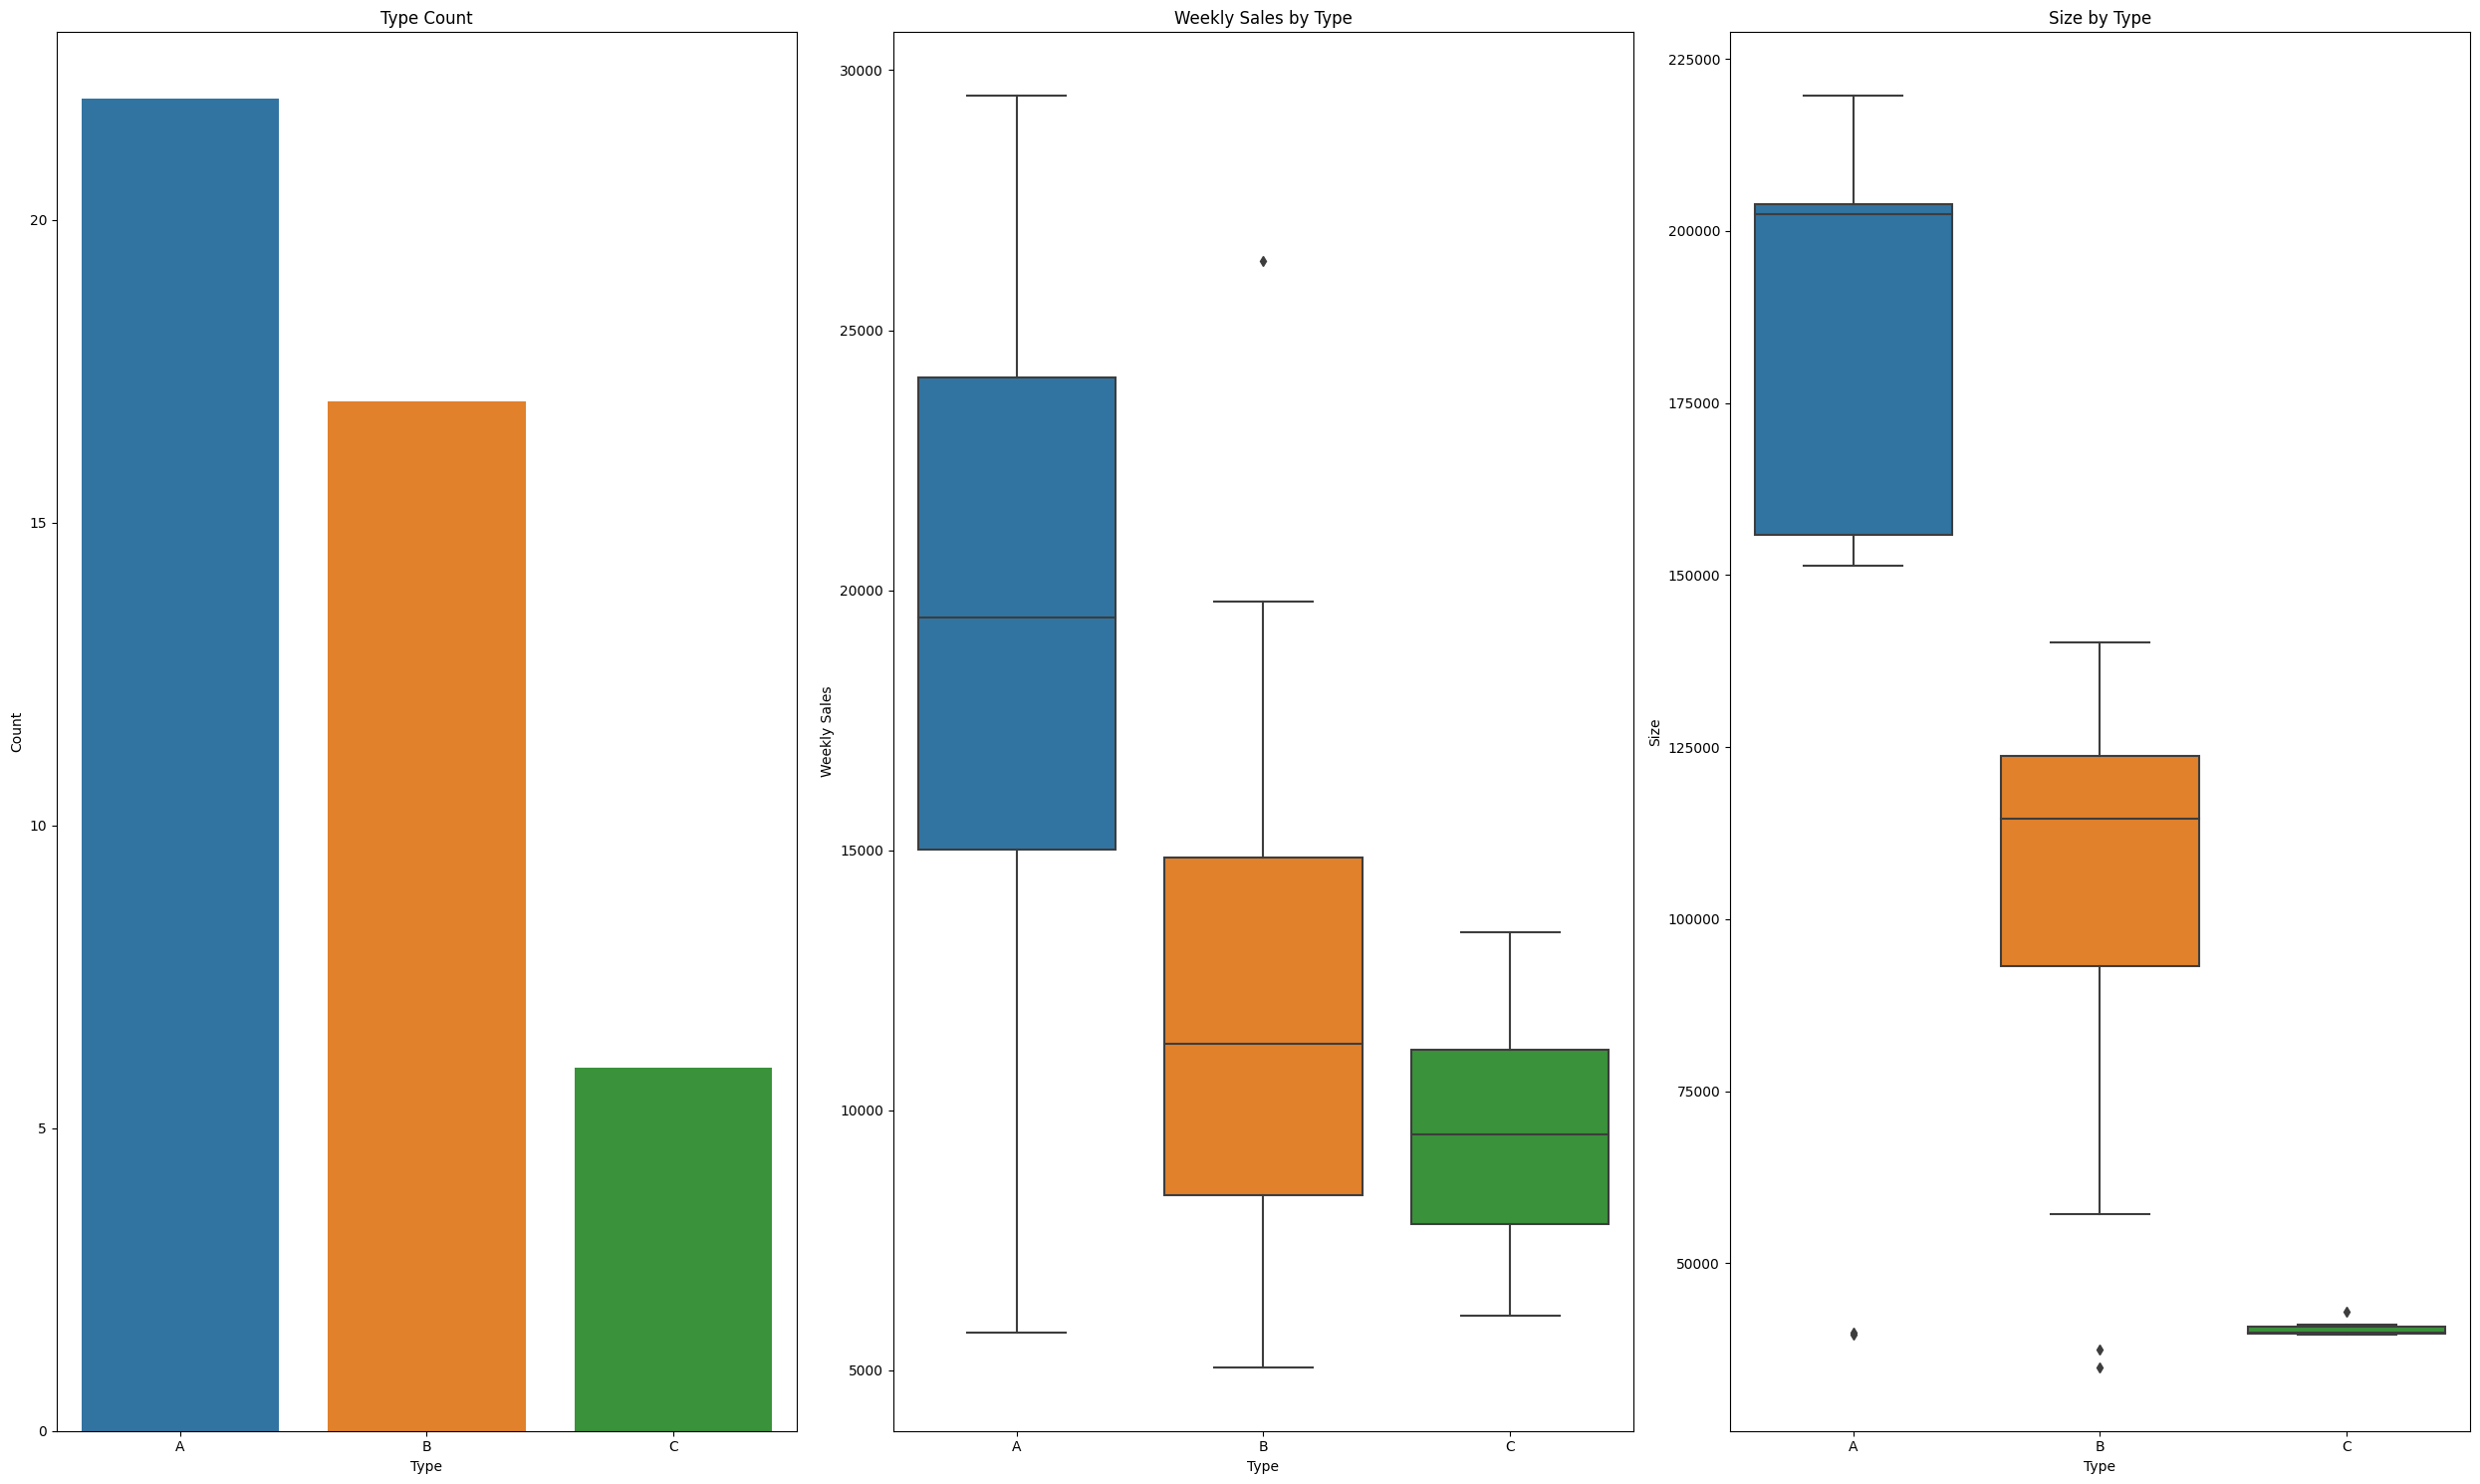

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_store_noMD is your dataframe

# Ensure the 'Type' column is categorical
df_store_noMD['Type'] = df_store_noMD['Type'].astype('category')

# Checking the categorical variables
col_categorical = df_store_noMD.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Bar plots for categorical variables
for i, j in enumerate(col_categorical):
    value_counts_df = df_store_noMD[j].value_counts().sort_values(ascending=False).to_frame()
    ax = axes[i]
    sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette, ax=ax)
    for x, y in enumerate(value_counts_df[j]):
        ax.text(x, y, str(y), ha='center', va='bottom')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(j)

# Additional subplots
ax_count = axes[0]
sns.countplot(data=df_store_noMD, x="Type", ax=ax_count)  # Use countplot for count
ax_count.set_xlabel("Type")
ax_count.set_ylabel("Count")
ax_count.set_title("Type Count")

ax_box1 = axes[1]
sns.boxplot(data=df_store_noMD, y="Weekly_Sales", x="Type", ax=ax_box1)
ax_box1.set_xlabel("Type")
ax_box1.set_ylabel("Weekly Sales")
ax_box1.set_title("Weekly Sales by Type")

ax_box2 = axes[2]
sns.boxplot(data=df_store_noMD, y="Size", x="Type", ax=ax_box2)
ax_box2.set_xlabel("Type")
ax_box2.set_ylabel("Size")
ax_box2.set_title("Size by Type")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Store Number')

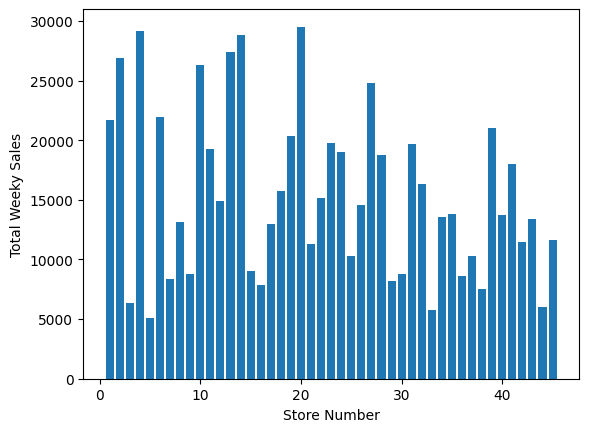

In [149]:
# weekly sales per store
bins = np.arange(1, 46)
plt.bar(x=bins, height=df_store_noMD["Weekly_Sales"].to_numpy())
plt.ylabel('Total Weeky Sales')
plt.xlabel("Store Number")

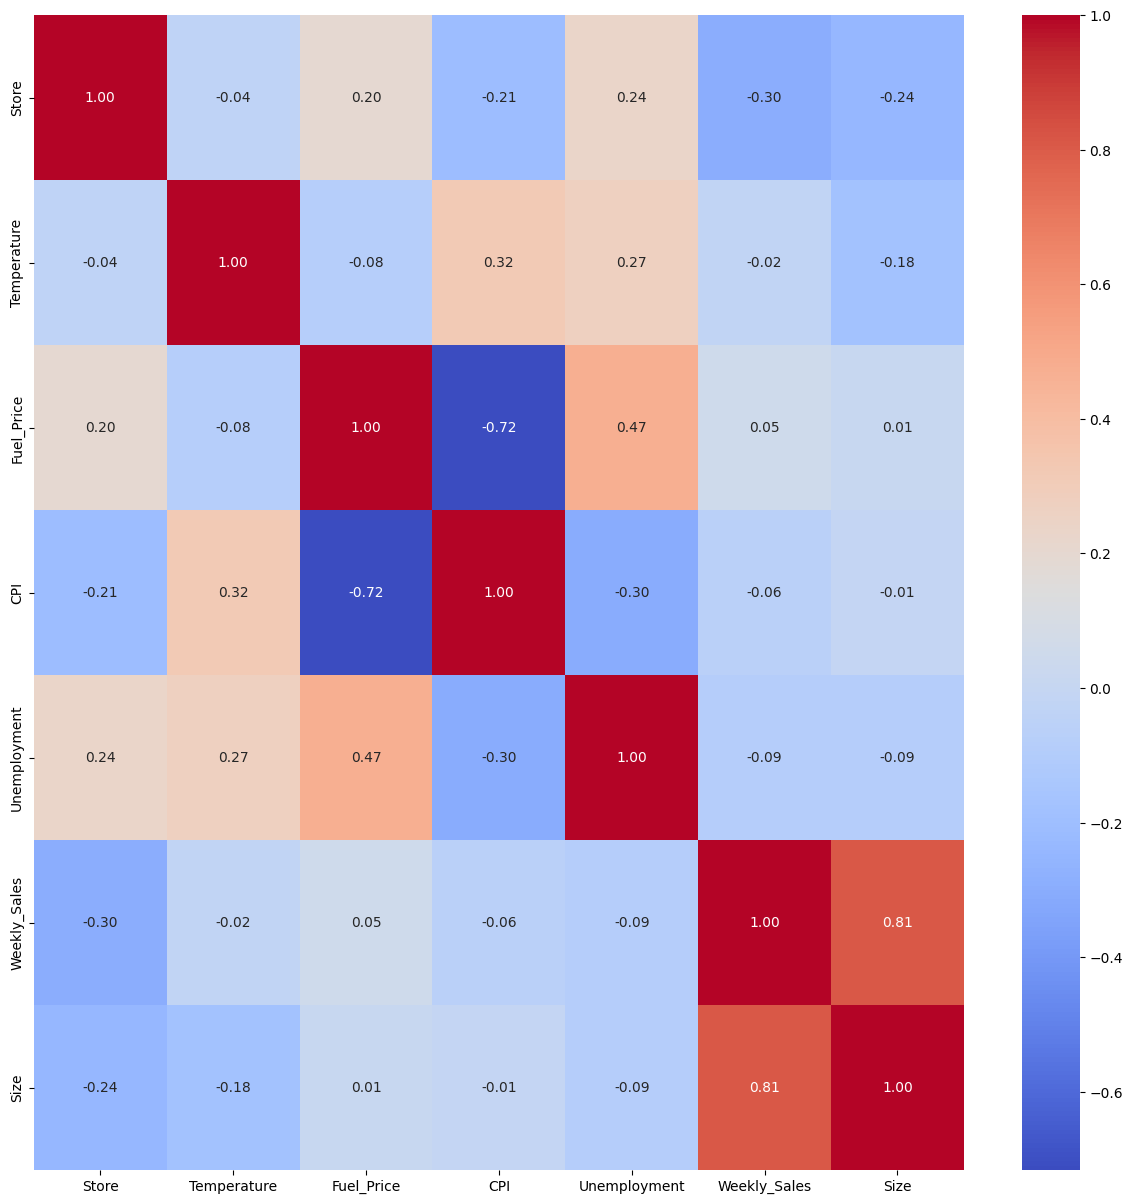

In [152]:
#correlation matrix to see which features are highly correlated to the Weekly Sales feature
df_store_noMD.drop(columns=['IsHoliday'], inplace=True)
corr_matrix_snMD = df_store_noMD.corr()
corr_matrix_snMD["Weekly_Sales"].sort_values(ascending=False)

# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_snMD, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

## Model Creation

`Clustering Model`

`Prediction Models`